In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
import os
os.listdir('west_nile/input')


['mapdata_copyright_openstreetmap_contributors.rds',
 'mapdata_copyright_openstreetmap_contributors.txt',
 'noaa_weather_qclcd_documentation.pdf',
 'sampleSubmission.csv',
 'spray.csv',
 'test.csv',
 'train.csv',
 'weather.csv']

In [93]:
train = pd.read_csv('west_nile/input/train.csv')
spray = pd.read_csv('west_nile/input/spray.csv')
weather = pd.read_csv('west_nile/input/weather.csv')

In [94]:
def make_long_lat_tuple(r):
    lat = r['Latitude']
    lng = r['Longitude']
    return (lat, lng)

In [98]:
print(train.dtypes)
train.head()

# train['LongLatTuple'] = pd.Series(list(zip(train['Latitude'], train['Longitude'])))
# train.head()
train.WnvPresent.value_counts()

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object


0    9955
1     551
Name: WnvPresent, dtype: int64

In [75]:
spray.head()
spray['LongLatTuple'] = spray.apply(make_long_lat_tuple, axis=1)
spray.head()
# long_lat_df = pd.DataFrame(list(set(spray['LongLatTuple']).union(set(train['LongLatTuple']))))

,Date,Time,Latitude,Longitude,LongLatTuple
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,"(42.3916233333, -88.0891633333)"
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,"(42.3913483333, -88.0891633333)"
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,"(42.3910216667, -88.0891566667)"
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,"(42.3906366667, -88.0891583333)"
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,"(42.39041, -88.0888583333)"


In [80]:
weather.head()
# weather.columns

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


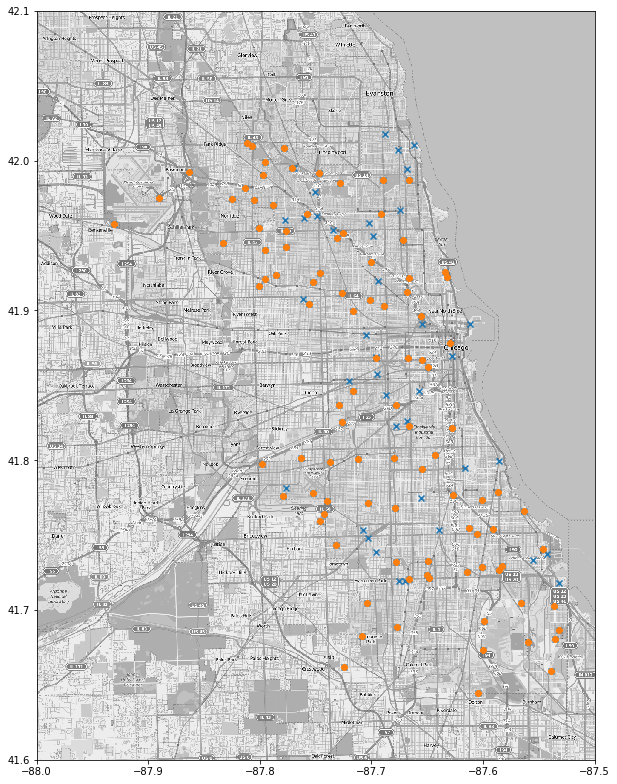

In [99]:
mapdata = np.loadtxt("west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('west_nile/input/train.csv')[['Date', 'Species', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

locations_with_virus = traps[traps.WnvPresent==1][['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(locations_with_virus[:,0], locations_with_virus[:,1], marker='o')
# how many have a culex ; vis by season / pos rate ; vis by humidity ; vis by temp ; vis by wind

In [49]:
train.head()
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train.drop([c for c in train.columns if 'Address' in c or 'Street' in c], axis=1, inplace=True)

In [50]:
train.head()

,Date,Species,Block,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,1,0,2007,5,29
1,2007-05-29,CULEX RESTUANS,41,T002,41.954690,-87.800991,1,0,2007,5,29
2,2007-05-29,CULEX RESTUANS,62,T007,41.994991,-87.769279,1,0,2007,5,29
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,1,0,2007,5,29
4,2007-05-29,CULEX RESTUANS,79,T015,41.974089,-87.824812,4,0,2007,5,29


In [51]:
train.Species.unique()
# to turn species into dummy variables

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [52]:
train.dtypes


Date            datetime64[ns]
Species                 object
Block                    int64
Trap                    object
Latitude               float64
Longitude              float64
NumMosquitos             int64
WnvPresent               int64
Year                     int64
Month                    int64
Day                      int64
dtype: object